<a href="https://colab.research.google.com/github/Hercules96/EDA-TitanicDataset/blob/main/Titanic_Dataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Why do EDA

- Model building
- Analysis and reporting
- Validate assumptions
- Handling missing values
- feature engineering
- detecting outliers

In [ ]:
# Remember it is an iterative process

### Column Types

- **Numerical** - Age,Fare,PassengerId
- **Categorical** - Survived, Pclass, Sex, SibSp, Parch,Embarked
- **Mixed** - Name, Ticket, Cabin

### Univariate Analysis

Univariate analysis focuses on analyzing each feature in the dataset independently.

- **Distribution analysis**: The distribution of each feature is examined to identify its shape, central tendency, and dispersion.

- **Identifying potential issues**: Univariate analysis helps in identifying potential problems with the data such as outliers, skewness, and missing values

#### The shape of a data distribution refers to its overall pattern or form as it is represented on a graph. Some common shapes of data distributions include:

- **Normal Distribution**: A symmetrical and bell-shaped distribution where the mean, median, and mode are equal and the majority of the data falls in the middle of the distribution with gradually decreasing frequencies towards the tails.

- **Skewed Distribution**: A distribution that is not symmetrical, with one tail being longer than the other. It can be either positively skewed (right-skewed) or negatively skewed (left-skewed).

- **Bimodal Distribution**: A distribution with two peaks or modes.

- **Uniform Distribution**: A distribution where all values have an equal chance of occurring.

The shape of the data distribution is important in identifying the presence of outliers, skewness, and the type of statistical tests and models that can be used for further analysis.

#### **Dispersion** is a statistical term used to describe the spread or variability of a set of data. It measures how far the values in a data set are spread out from the central tendency (mean, median, or mode) of the data.

There are several measures of dispersion, including:

- **Range**: The difference between the largest and smallest values in a data set.

- **Variance**: The average of the squared deviations of each value from the mean of the data set.

- **Standard Deviation**: The square root of the variance. It provides a measure of the spread of the data that is in the same units as the original data.

- **Interquartile range (IQR)**: The range between the first quartile (25th percentile) and the third quartile (75th percentile) of the data.

Dispersion helps to describe the spread of the data, which can help to identify the presence of outliers and skewness in the data.

### Steps of doing Univariate Analysis on Numerical columns

- **Descriptive Statistics**: Compute basic summary statistics for the column, such as mean, median, mode, standard deviation, range, and quartiles. These statistics give a general understanding of the distribution of the data and can help identify skewness or outliers.

- **Visualizations**: Create visualizations to explore the distribution of the data. Some common visualizations for numerical data include histograms, box plots, and density plots. These visualizations provide a visual representation of the distribution of the data and can help identify skewness an outliers.

- **Identifying Outliers**: Identify and examine any outliers in the data. Outliers can be identified using visualizations. It is important to determine whether the outliers are due to measurement errors, data entry errors, or legitimate differences in the data, and to decide whether to include or exclude them from the analysis.

- **Skewness**: Check for skewness in the data and consider transforming the data or using robust statistical methods that are less sensitive to skewness, if necessary.

- **Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.


### Age

**conclusions**

- Age is normally(almost) distributed
- 20% of the values are missing
- There are some outliers

<Axes: ylabel='Frequency'>

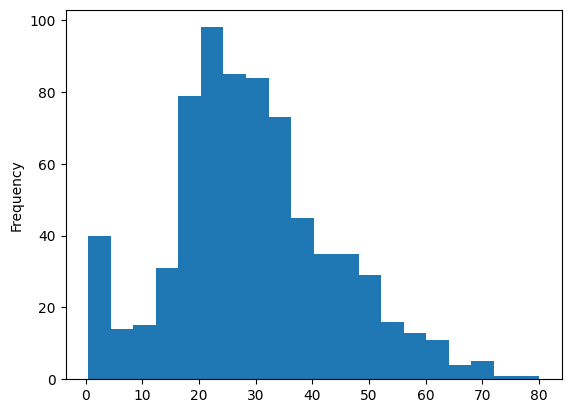

In [ ]:
df.Age.plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

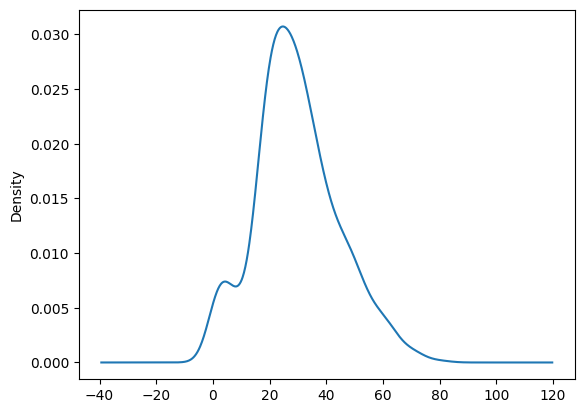

In [ ]:
df.Age.plot(kind='kde')

In [ ]:
df.Age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [ ]:
df.Age.skew()

0.38910778230082704

<Axes: >

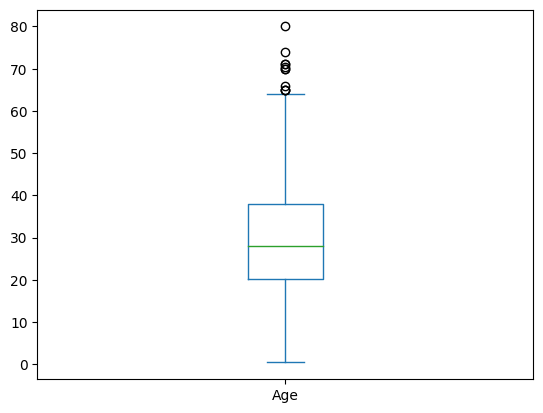

In [ ]:
df.Age.plot(kind='box')

### Fare
conclusion

-The data is highly(positivel) skewed

-Fare Column contains the group fare not the individual fare(This might be an issue)

-We need to create a column for individual columns

In [ ]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
df[df['Fare']==0.00]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [ ]:
df['Fare'].isnull().sum()

0

<Axes: ylabel='Frequency'>

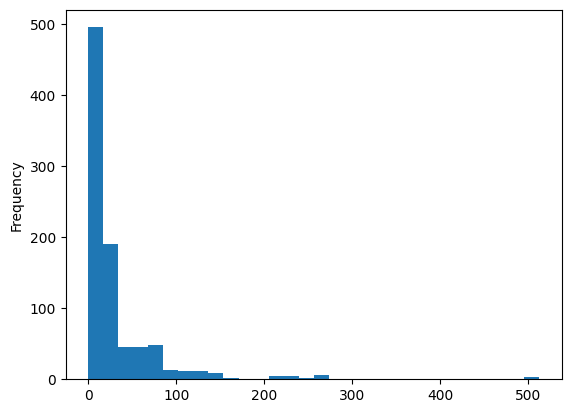

In [ ]:
df.Fare.plot(kind='hist',bins=30)

<Axes: >

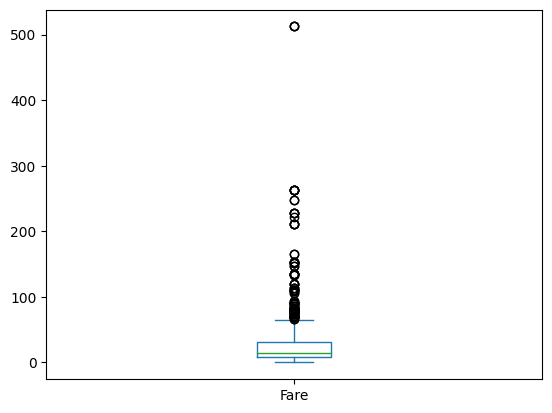

In [ ]:
df.Fare.plot(kind='box')

In [ ]:
df[df.Fare > 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [ ]:
df[df.Pclass ==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [ ]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: ylabel='Density'>

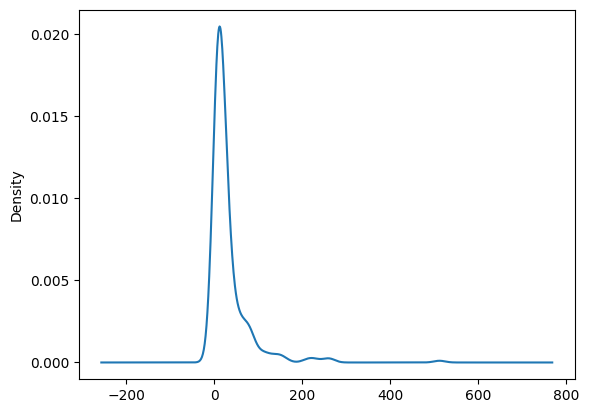

In [ ]:
df.Fare.plot(kind='kde')

In [ ]:
df.Fare.skew()

4.787316519674893

### Steps of doing Univariate Analysis on Categorical columns

**Descriptive Statistics**: Compute the frequency distribution of the categories in the column. This will give a general understanding of the distribution of the categories and their relative frequencies.

**Visualizations**: Create visualizations to explore the distribution of the categories. Some common visualizations for categorical data include count plots and pie charts. These visualizations provide a visual representation of the distribution of the categories and can help identify any patterns or anomalies in the data.

**Missing Values**: Check for missing values in the data and decide how to handle them. Missing values can be imputed or excluded from the analysis, depending on the research question and the data set.

**Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

### Survived

conclusion


-more than 60 percent of the people died

-There is no missing value

In [ ]:
 df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: >

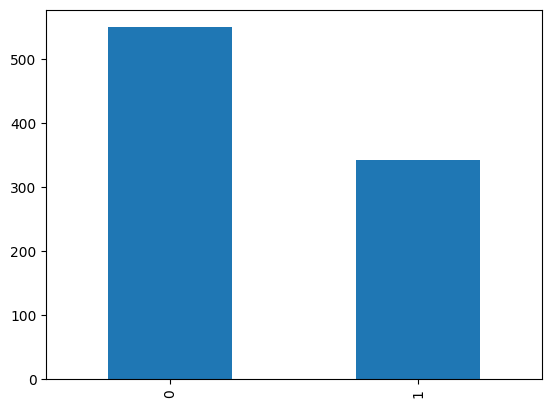

In [ ]:
lab= ['Died','Survived']
df.Survived.value_counts().plot(kind='bar')

<Axes: ylabel='Survived'>

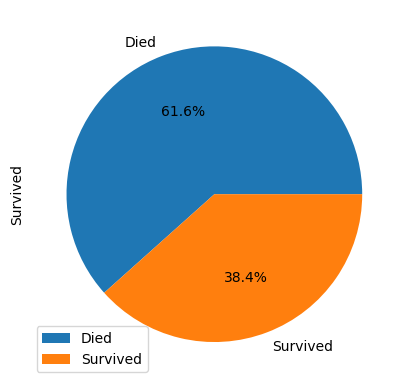

In [ ]:
my_labels = ['Died','Survived']
df.Survived.value_counts().plot(kind='pie' , autopct='%0.1f%%' , legend=True,labels = my_labels)

In [ ]:
df['Survived'].isnull().sum()

0

### Pclass

conclusions

-Surpisely more people traveled in Pclass 1 than in Pclass 2

-No missing value

In [ ]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<Axes: >

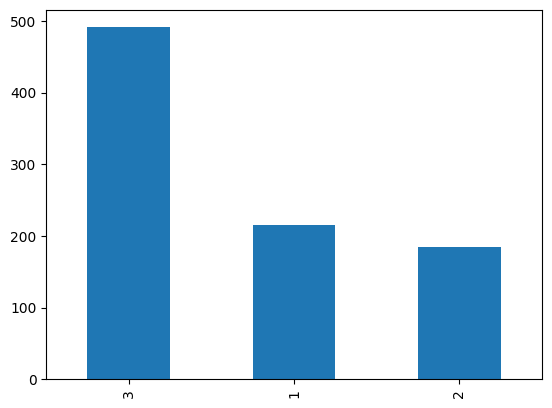

In [ ]:
df.Pclass.value_counts().plot(kind='bar')

<Axes: title={'center': 'Class 3 is the cheapest class and Class 1 is the Expensive class'}, ylabel='Pclass'>

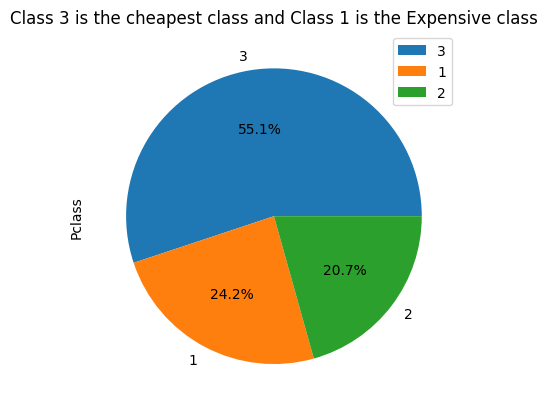

In [ ]:

df['Pclass'].value_counts().plot(kind='pie' , autopct='%0.1f%%' , legend=True , title ='Class 3 is the cheapest class and Class 1 is the Expensive class')

In [ ]:
df['Pclass'].isnull().sum()

0

### Sex

conclusion

-nearly 65 percent of the passengers are male

-There is no missing value

In [ ]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<Axes: >

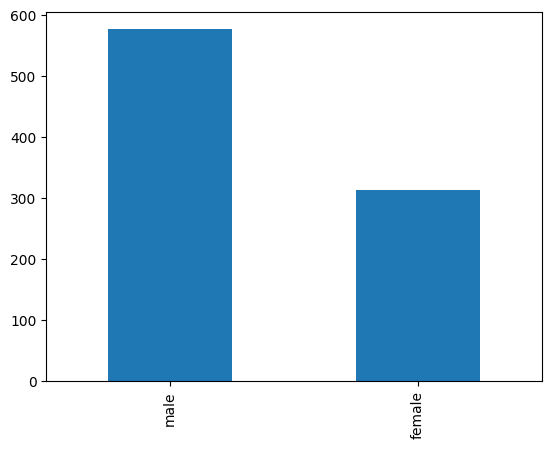

In [ ]:
df.Sex.value_counts().plot(kind='bar')

<Axes: ylabel='Sex'>

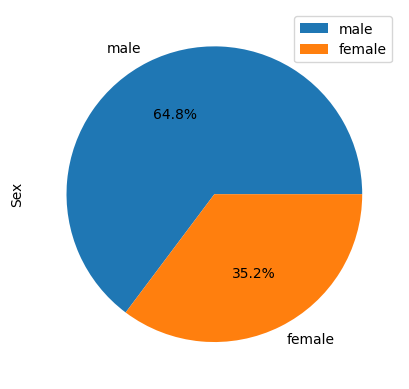

In [ ]:

df['Sex'].value_counts().plot(kind='pie' , autopct='%0.1f%%' , legend=True)

In [ ]:
df['Sex'].isnull().sum()

0

### SibSp

-Nearly 70% of the peoples are travelling alone

-there is no missing value

In [ ]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<Axes: >

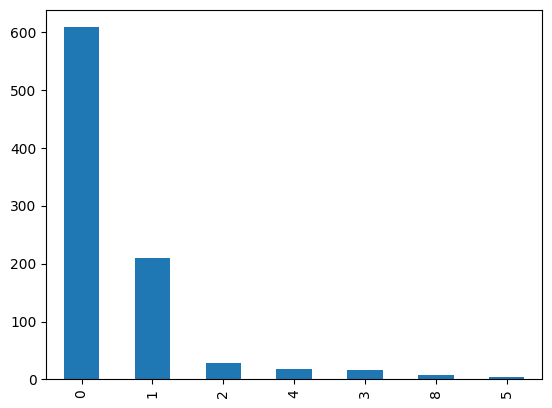

In [ ]:
df.SibSp.value_counts().plot(kind='bar')

<Axes: ylabel='SibSp'>

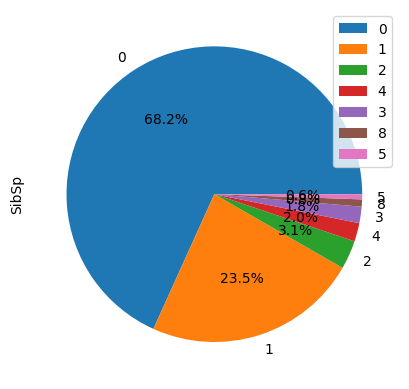

In [ ]:
df['SibSp'].value_counts().plot(kind='pie' , autopct='%0.1f%%' , legend=True)

In [ ]:
df['SibSp'].isnull().sum()

0

### Parch

conclusion

-We can create a new column which represent whether a person is travelling alone?

-Parch and SibSp cols can be combined together to form a single column

-Maximum 6members of a family are travelling

-more than 75% of the people are travelling alone

-no missing data in the table

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

<Axes: >

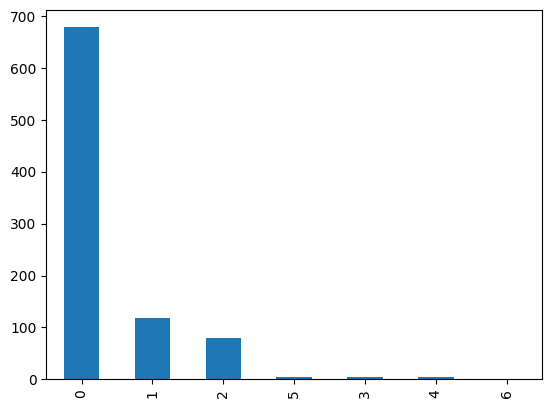

In [ ]:
df.Parch.value_counts().plot(kind='bar')

<Axes: ylabel='Parch'>

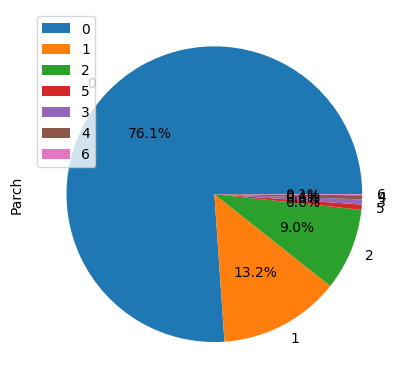

In [ ]:
df['Parch'].value_counts().plot(kind='pie' , autopct='%0.1f%%' , legend=True , )

In [ ]:
df['Parch'].isnull().sum()

0

### Embarked

conclusion

-There are three different stations

1.**Southampton**

2.**Queenstown**

3.**Cherbourg**

Started from Southampton,England and the last station is Queenstown,France


In [ ]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<Axes: >

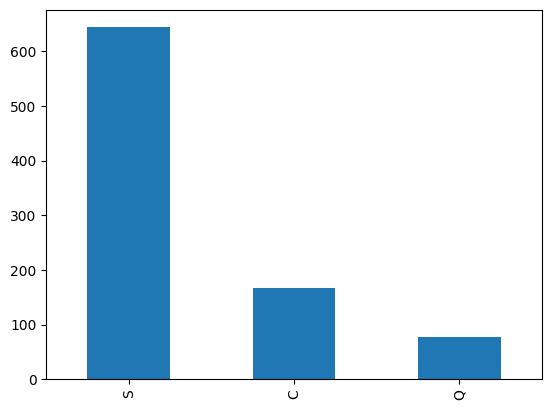

In [ ]:
df.Embarked.value_counts().plot(kind='bar')

<Axes: ylabel='Embarked'>

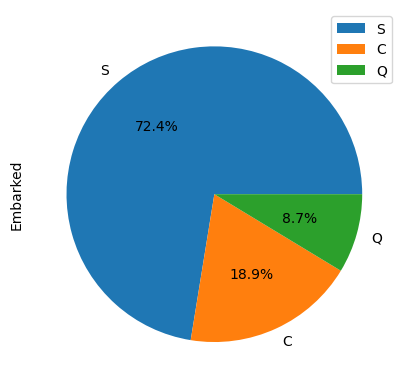

In [ ]:
df['Embarked'].value_counts().plot(kind='pie' , autopct='%0.1f%%' , legend=True , )

In [ ]:
df['Embarked'].isnull().sum()

2

### Mixed Columns

Need to feature engineer the columns to get more insights

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Steps of doing Bivariate Analysis

- Select 2 cols
- Understand type of relationship
    1. **Numerical - Numerical**<br>
        a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots<br>
        b. Check correlation coefficent to check linear relationship
    2. **Numerical - Categorical** - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.<br>
        a. You can plot graphs like barplot, boxplot, kdeplot violinplot even scatterplots<br>
    3. **Categorical - Categorical**<br>
        a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.<br>
        b. You can plots like heatmap, stacked barplots, treemaps
        
- Write your conclusions

### Survived - Pclass

conclusion

-Out of the all combinations the passergers of pclass1 survived the most (39%)

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
pd.crosstab(df['Survived'],df['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [ ]:
pd.crosstab(df['Survived'],df['Pclass'],normalize='index')*100

Pclass,1,2,3
Survived,,,
0,14.571949,17.668488,67.759563
1,39.766082,25.438596,34.795322


Insights of the above result

Out of the Dead passengers 14% are of Pclass1 , 17% are of Pclass2 and 67% are of Pclass3

Out of the Survived passengers 39% are of Pclass1 , 25% are of Pclass2 and 34% are of Pclass3

In [ ]:
pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


<Axes: xlabel='Pclass', ylabel='Survived'>

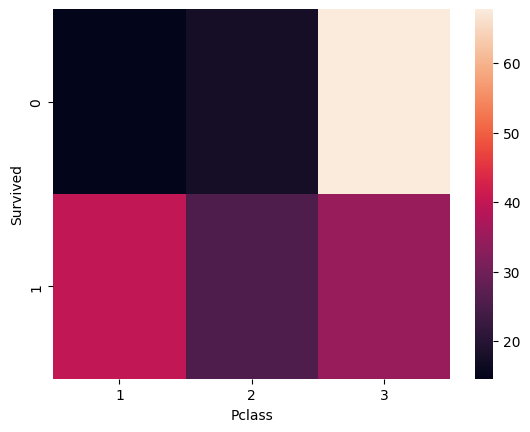

In [ ]:
sns.heatmap(pd.crosstab(df['Survived'],df['Pclass'],normalize='index')*100)

### Survived - Sex

conclusion

-Female are prefered than male by safety guards

In [ ]:
pd.crosstab(df['Survived'],df['Sex'],normalize='index')*100

Sex,female,male
Survived,,
0,14.754098,85.245902
1,68.128655,31.871345


<Axes: xlabel='Sex', ylabel='Survived'>

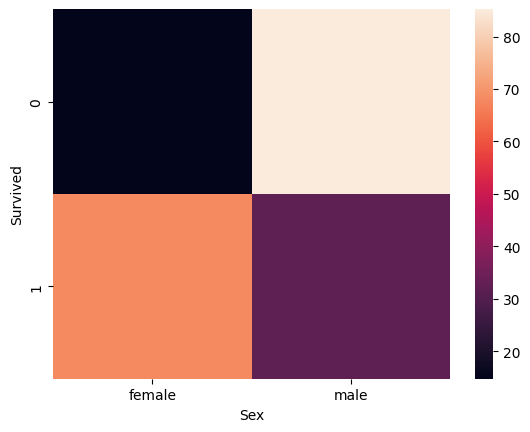

In [ ]:
sns.heatmap(pd.crosstab(df['Survived'],df['Sex'],normalize='index')*100)

### Survived - Embarked

conclusion

-Out of the survived passengers , Cherbourg Station passengers survived the most

In [ ]:
pd.crosstab(df['Survived'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


In [ ]:
pd.crosstab(df['Survived'],df['Embarked'],normalize='index')*100

Embarked,C,Q,S
Survived,,,
0,13.661202,8.561020,77.777778
1,27.352941,8.823529,63.823529


<Axes: xlabel='Embarked', ylabel='Survived'>

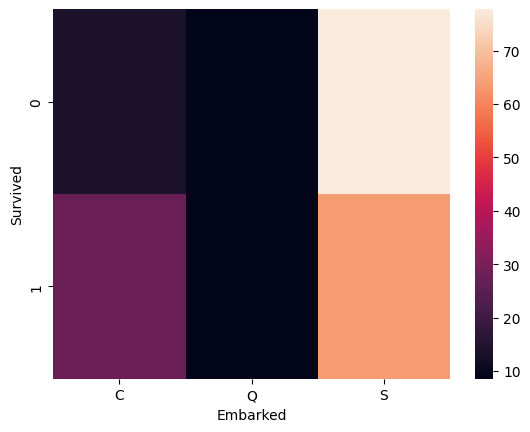

In [ ]:
sns.heatmap(pd.crosstab(df['Survived'],df['Embarked'],normalize='index')*100)

In [ ]:
pd.crosstab(df['Sex'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Sex,,,
female,43.452381,46.753247,31.521739
male,56.547619,53.246753,68.478261


In [ ]:
pd.crosstab(df['Pclass'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Pclass,,,
1,50.595238,2.597403,19.720497
2,10.119048,3.896104,25.465839
3,39.285714,93.506494,54.813665


### Age - Survived

conclusion

-Passengers between 0-5years survived over dead passengers in this categories

-going from 5-40 years dead passengers are more over dead in this categories

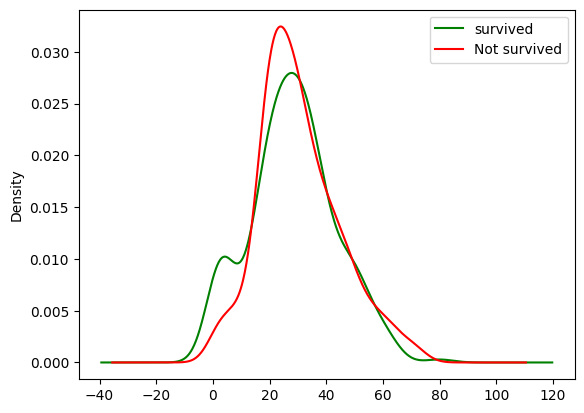

In [ ]:
df[df['Survived'] ==1]['Age'].plot(kind='kde' ,color='Green',label="survived")
df[df['Survived'] ==0]['Age'].plot(kind='kde' ,color='Red' , label='Not survived')

plt.legend()
plt.show()

In [ ]:
df[df['Pclass']==1]['Age'].mean()

38.233440860215055

### Feature Engineering

--Fare and Passengers
There is an issue in the fare column .The fare column contain the total fare of the family.

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [ ]:
df[df['SibSp'] == 8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [ ]:
df1 = pd.read_csv('/content/test (1).csv')

In [ ]:
df1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df = pd.concat([df,df1])

In [ ]:
df[df['Ticket'] == 'CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0.0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0.0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0.0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0.0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0.0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
188,1080,NaN,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S
342,1234,NaN,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S
360,1252,NaN,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S


In [ ]:
df[df['Ticket']=='CA. 2343'].value_counts

<bound method DataFrame.value_counts of      PassengerId  Survived  Pclass                               Name     Sex  \
159          160       0.0       3         Sage, Master. Thomas Henry    male   
180          181       0.0       3       Sage, Miss. Constance Gladys  female   
201          202       0.0       3                Sage, Mr. Frederick    male   
324          325       0.0       3           Sage, Mr. George John Jr    male   
792          793       0.0       3            Sage, Miss. Stella Anna  female   
846          847       0.0       3           Sage, Mr. Douglas Bullen    male   
863          864       0.0       3  Sage, Miss. Dorothy Edith "Dolly"  female   
188         1080       NaN       3                    Sage, Miss. Ada  female   
342         1234       NaN       3              Sage, Mr. John George    male   
360         1252       NaN       3        Sage, Master. William Henry    male   
365         1257       NaN       3     Sage, Mrs. John (Annie Bullen)

In [ ]:
df['Individual_fare'] = df['Fare']/(df['SibSp']+df['Parch']+1)

<Axes: >

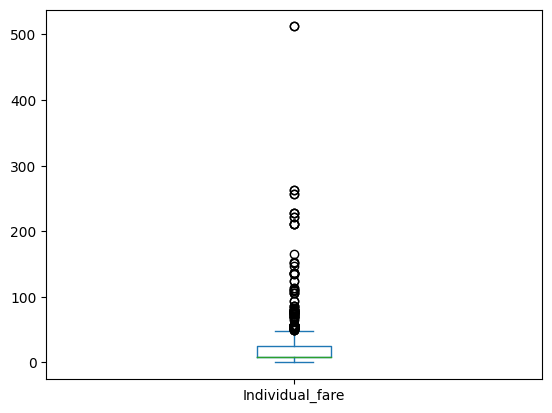

In [ ]:
df['Individual_fare'].plot(kind='box')

In [ ]:
df[['Individual_fare','Fare']].describe()

,Individual_fare,Fare
count,1308.000000,1308.000000
mean,20.518215,33.295479
std,35.774337,51.758668
min,0.000000,0.000000
25%,7.452767,7.895800
50%,8.512483,14.454200
75%,24.237500,31.275000
max,512.329200,512.329200


In [ ]:
df[df['Fare']==512.329200]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual_fare
258,259,1.0,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,512.3292
679,680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,256.1646
737,738,1.0,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,512.3292
343,1235,NaN,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,256.1646


### Feature Engineering Parent -Child

1.   Having two different Columns are not any required , we can have only one column for this.



In [ ]:
df['family_size'] = df['Parch'] + df['SibSp']

In [ ]:
# family_type
# 1 -> alone
# 2-4 -> small
# 5> -> large

def transform_family_size(num):

  if num == 1:
    return 'alone'
  elif num>1 and num<5:
    return "small"
  else:
    return "large"


In [ ]:
df['family_type'] = df['family_size'].apply(transform_family_size)

In [ ]:
df.family_type

0      alone
1      alone
2      large
3      alone
4      large
       ...  
413    large
414    large
415    large
416    large
417    small
Name: family_type, Length: 1309, dtype: object

In [ ]:
pd.crosstab(df['Survived'],df['family_type'],normalize = 'columns')*100

family_type,alone,large,small
Survived,,,
0.0,44.720497,70.890411,43.150685
1.0,55.279503,29.109589,56.849315


<Axes: xlabel='family_type', ylabel='Survived'>

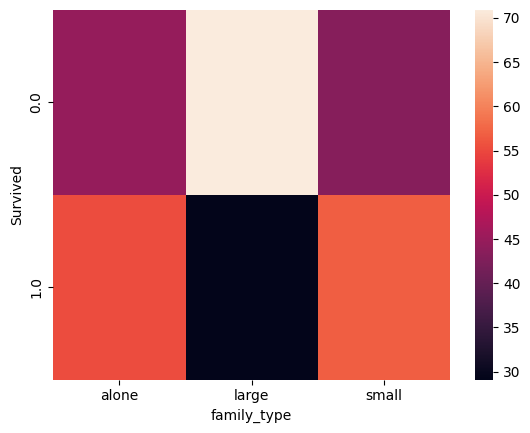

In [ ]:
sns.heatmap(pd.crosstab(df['Survived'],df['family_type'],normalize = 'columns')*100)

### Feature Engineering

Name

In [ ]:
#Spliting the Name in Surname and Individual name
df['Name'].str.split(',').str.get(0)

0             Braund
1            Cumings
2          Heikkinen
3           Futrelle
4              Allen
           ...      
413          Spector
414    Oliva y Ocana
415          Saether
416             Ware
417            Peter
Name: Name, Length: 1309, dtype: object

In [ ]:
df['Surname'] = df['Name'].str.split(',').str.get(0)

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual_fare,family_size,family_type,Surname
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,1,alone,Braund
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,1,alone,Cumings
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,0,large,Heikkinen
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,1,alone,Futrelle
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,0,large,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,0,large,Spector
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,0,large,Oliva y Ocana
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,0,large,Saether
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,0,large,Ware


In [ ]:
df['Name'].str.split(',').str.get(1).str.strip().str.split(' ').str.get(0)

0          Mr.
1         Mrs.
2        Miss.
3         Mrs.
4          Mr.
        ...   
413        Mr.
414      Dona.
415        Mr.
416        Mr.
417    Master.
Name: Name, Length: 1309, dtype: object

In [ ]:
df['Title'] = df['Name'].str.split(',').str.get(1).str.strip().str.split(' ').str.get(0)

In [ ]:
df['Title']

0          Mr.
1         Mrs.
2        Miss.
3         Mrs.
4          Mr.
        ...   
413        Mr.
414      Dona.
415        Mr.
416        Mr.
417    Master.
Name: Title, Length: 1309, dtype: object

In [ ]:
df['Title'].value_counts()

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
the            1
Jonkheer.      1
Dona.          1
Name: Title, dtype: int64

In [ ]:
df['Title'] = df['Title'].replace('Jonkheer.' ,'others')
df['Title'] = df['Title'].replace('the' ,'others')
df['Title'] = df['Title'].replace('Capt.' ,'others')
df['Title'] = df['Title'].replace('Mme.' ,'Miss.')
df['Title'] = df['Title'].replace('Sir.' ,'others')
df['Title'] = df['Title'].replace('Lady.' ,'Miss.')
df['Title'] = df['Title'].replace('Ms.' ,'Miss.')
df['Title'] = df['Title'].replace('Major.' ,'others')
df['Title'] = df['Title'].replace('Mlle.' ,'Miss.')
df['Title'] = df['Title'].replace('Col.' ,'others')
df['Title'] = df['Title'].replace('Dr.' ,'others')
df['Title'] = df['Title'].replace('Rev.' ,'others')
df['Title'] = df['Title'].replace('Don.' ,'others')
df['Title'] = df['Title'].replace('Dona.' ,'Miss.')

In [ ]:
df['Title'].value_counts()

Mr.        757
Miss.      267
Mrs.       197
Master.     61
others      27
Name: Title, dtype: int64

In [ ]:
pd.crosstab(df['Survived'],df['Title'] , normalize='columns')*100

Title,Master.,Miss.,Mr.,Mrs.,others
Survived,,,,,
0.0,42.5,29.411765,84.332689,20.8,68.181818
1.0,57.5,70.588235,15.667311,79.2,31.818182


In [ ]:
df['Cabin'].value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: Cabin, Length: 186, dtype: int64

In [ ]:
df['Cabin'].fillna('M',inplace=True)

In [ ]:
df['Cabin'].value_counts()

M                  1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
F33                   4
                   ... 
A14                   1
E63                   1
E12                   1
E38                   1
C105                  1
Name: Cabin, Length: 187, dtype: int64

In [ ]:
df['Deck'] =df['Cabin'].str[0]

In [ ]:
df['Deck'].value_counts()

M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Deck, dtype: int64

In [ ]:
pd.crosstab(df['Deck'] , df['Pclass'])

Pclass,1,2,3
Deck,,,
A,22,0,0
B,65,0,0
C,94,0,0
D,40,6,0
E,34,4,3
F,0,13,8
G,0,0,5
M,67,254,693
T,1,0,0


### Survived and Deck

conclusion

-the probability that a person will servive depends upon the Location in the cabin

In [ ]:
pd.crosstab(df['Survived'] ,df['Deck'] , normalize = 'columns' )*100

Deck,A,B,C,D,E,F,G,M,T
Survived,,,,,,,,,
0.0,53.333333,25.531915,40.677966,24.242424,25.0,38.461538,50.0,70.014556,100.0
1.0,46.666667,74.468085,59.322034,75.757576,75.0,61.538462,50.0,29.985444,0.0


In [ ]:
pd.crosstab(df['Deck'] ,df['Survived'], normalize = 'columns' )*100

Survived,0.0,1.0
Deck,,
A,1.457195,2.046784
B,2.185792,10.233918
C,4.371585,10.233918
D,1.457195,7.309942
E,1.457195,7.017544
F,0.910747,2.339181
G,0.364299,0.584795
M,87.613843,60.233918
T,0.182149,0.000000


In [ ]:
pd.crosstab(df['Deck'] , df['Survived'],normalize='index')

Survived,0.0,1.0
Deck,,
A,0.533333,0.466667
B,0.255319,0.744681
C,0.406780,0.593220
D,0.242424,0.757576
E,0.250000,0.750000
F,0.384615,0.615385
G,0.500000,0.500000
M,0.700146,0.299854
T,1.000000,0.000000


<Axes: xlabel='Deck'>

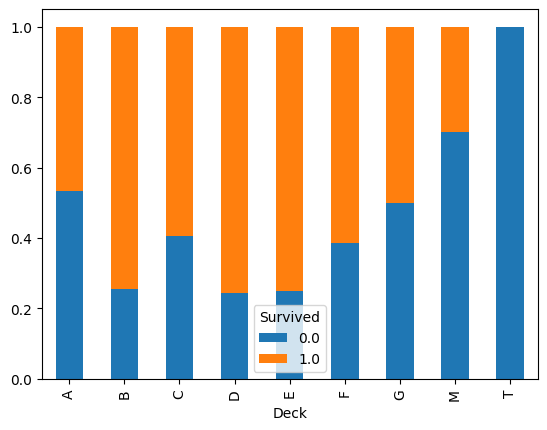

In [ ]:
pd.crosstab(df['Deck'] , df['Survived'],normalize='index').plot(kind='bar' , stacked=True)

In [ ]:
df.corr()['Survived']

<ipython-input-170-57d70bb92b5b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Survived']


PassengerId       -0.005007
Survived           1.000000
Pclass            -0.338481
Age               -0.077221
SibSp             -0.035322
Parch              0.081629
Fare               0.257307
Individual_fare    0.221600
family_size        0.016639
Name: Survived, dtype: float64

<ipython-input-171-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

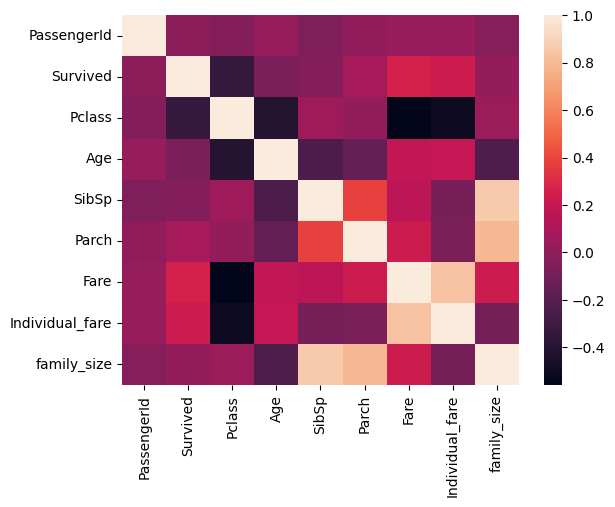

In [ ]:
sns.heatmap(df.corr())

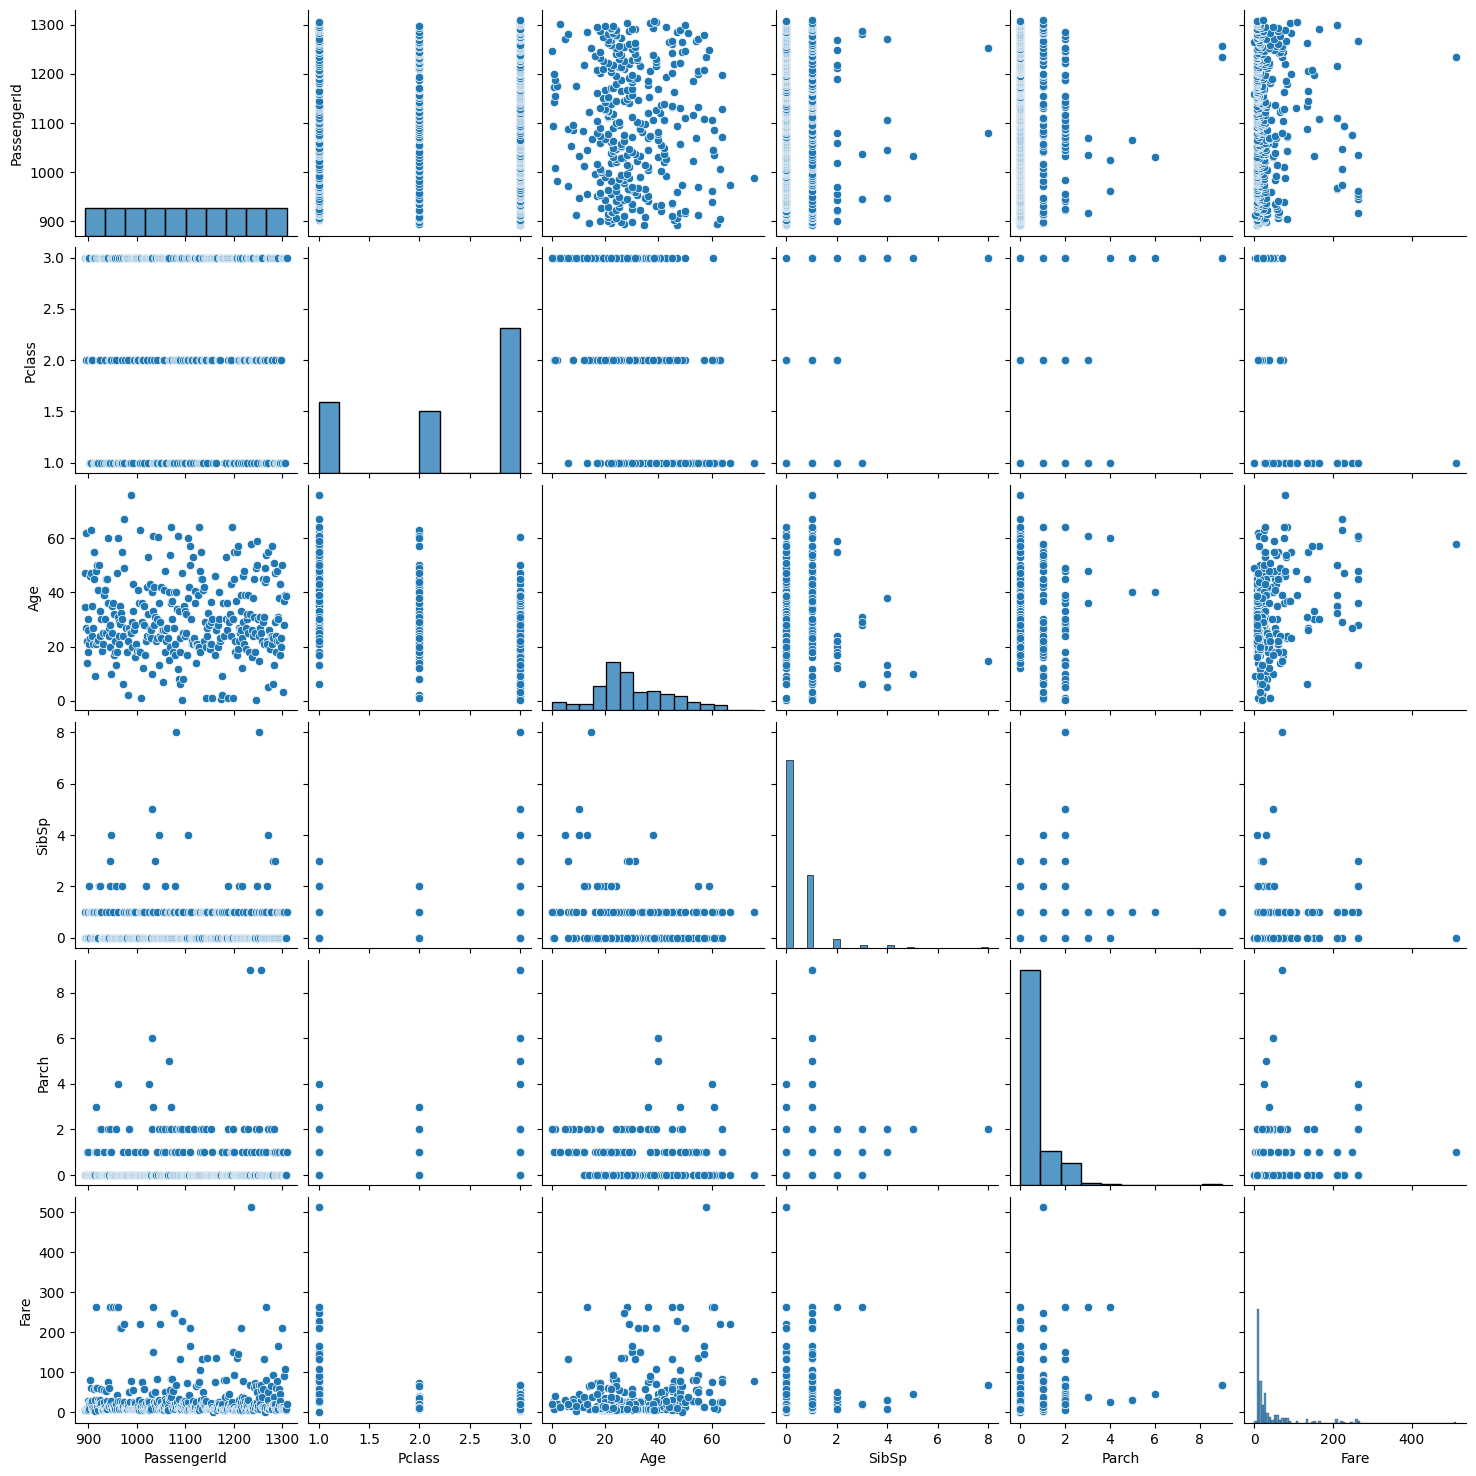

In [ ]:
sns.pairplot(df1)